In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from joblib import dump, load  #object save and load operation

#disply inline of plots
%matplotlib inline

In [3]:
data=pd.read_csv("Real estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

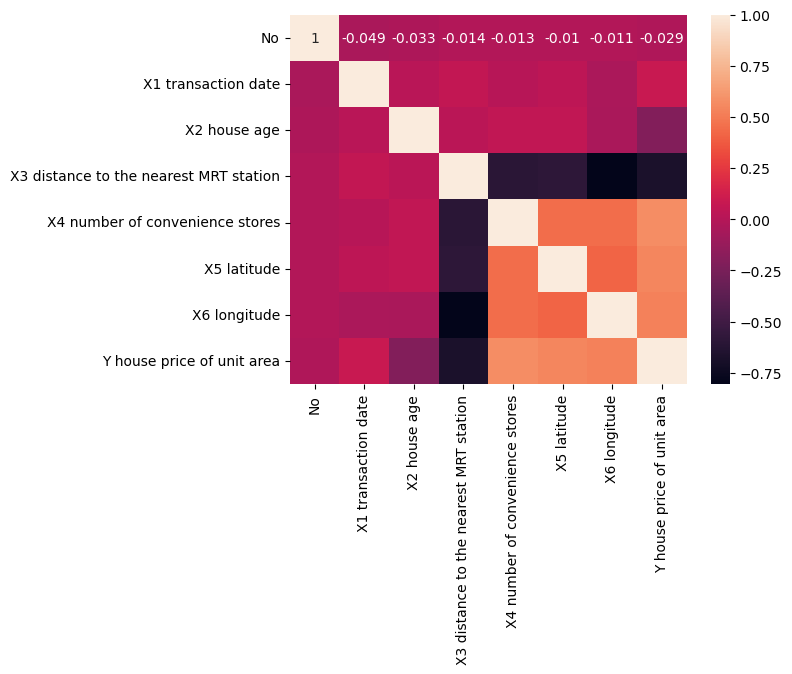

In [7]:
sns.heatmap(data.corr(),annot=True)

# Exploratory Data Analysis (EDA)

In [8]:
df=data.copy()
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

      No  X1 transaction date
0      1             2012.917
1      2             2012.917
2      3             2013.583
3      4             2013.500
4      5             2012.833
..   ...                  ...
409  410             2013.000
410  411             2012.667
411  412             2013.250
412  413             2013.000
413  414             2013.500

[414 rows x 2 columns]
      No  X2 house age
0      1          32.0
1      2          19.5
2      3          13.3
3      4          13.3
4      5           5.0
..   ...           ...
409  410          13.7
410  411           5.6
411  412          18.8
412  413           8.1
413  414           6.5

[414 rows x 2 columns]
     X1 transaction date  X2 house age
0               2012.917          32.0
1               2012.917          19.5
2               2013.583          13.3
3               2013.500          13.3
4               2012.833           5.0
..                   ...           ...
409             2013.000          13.7
410 

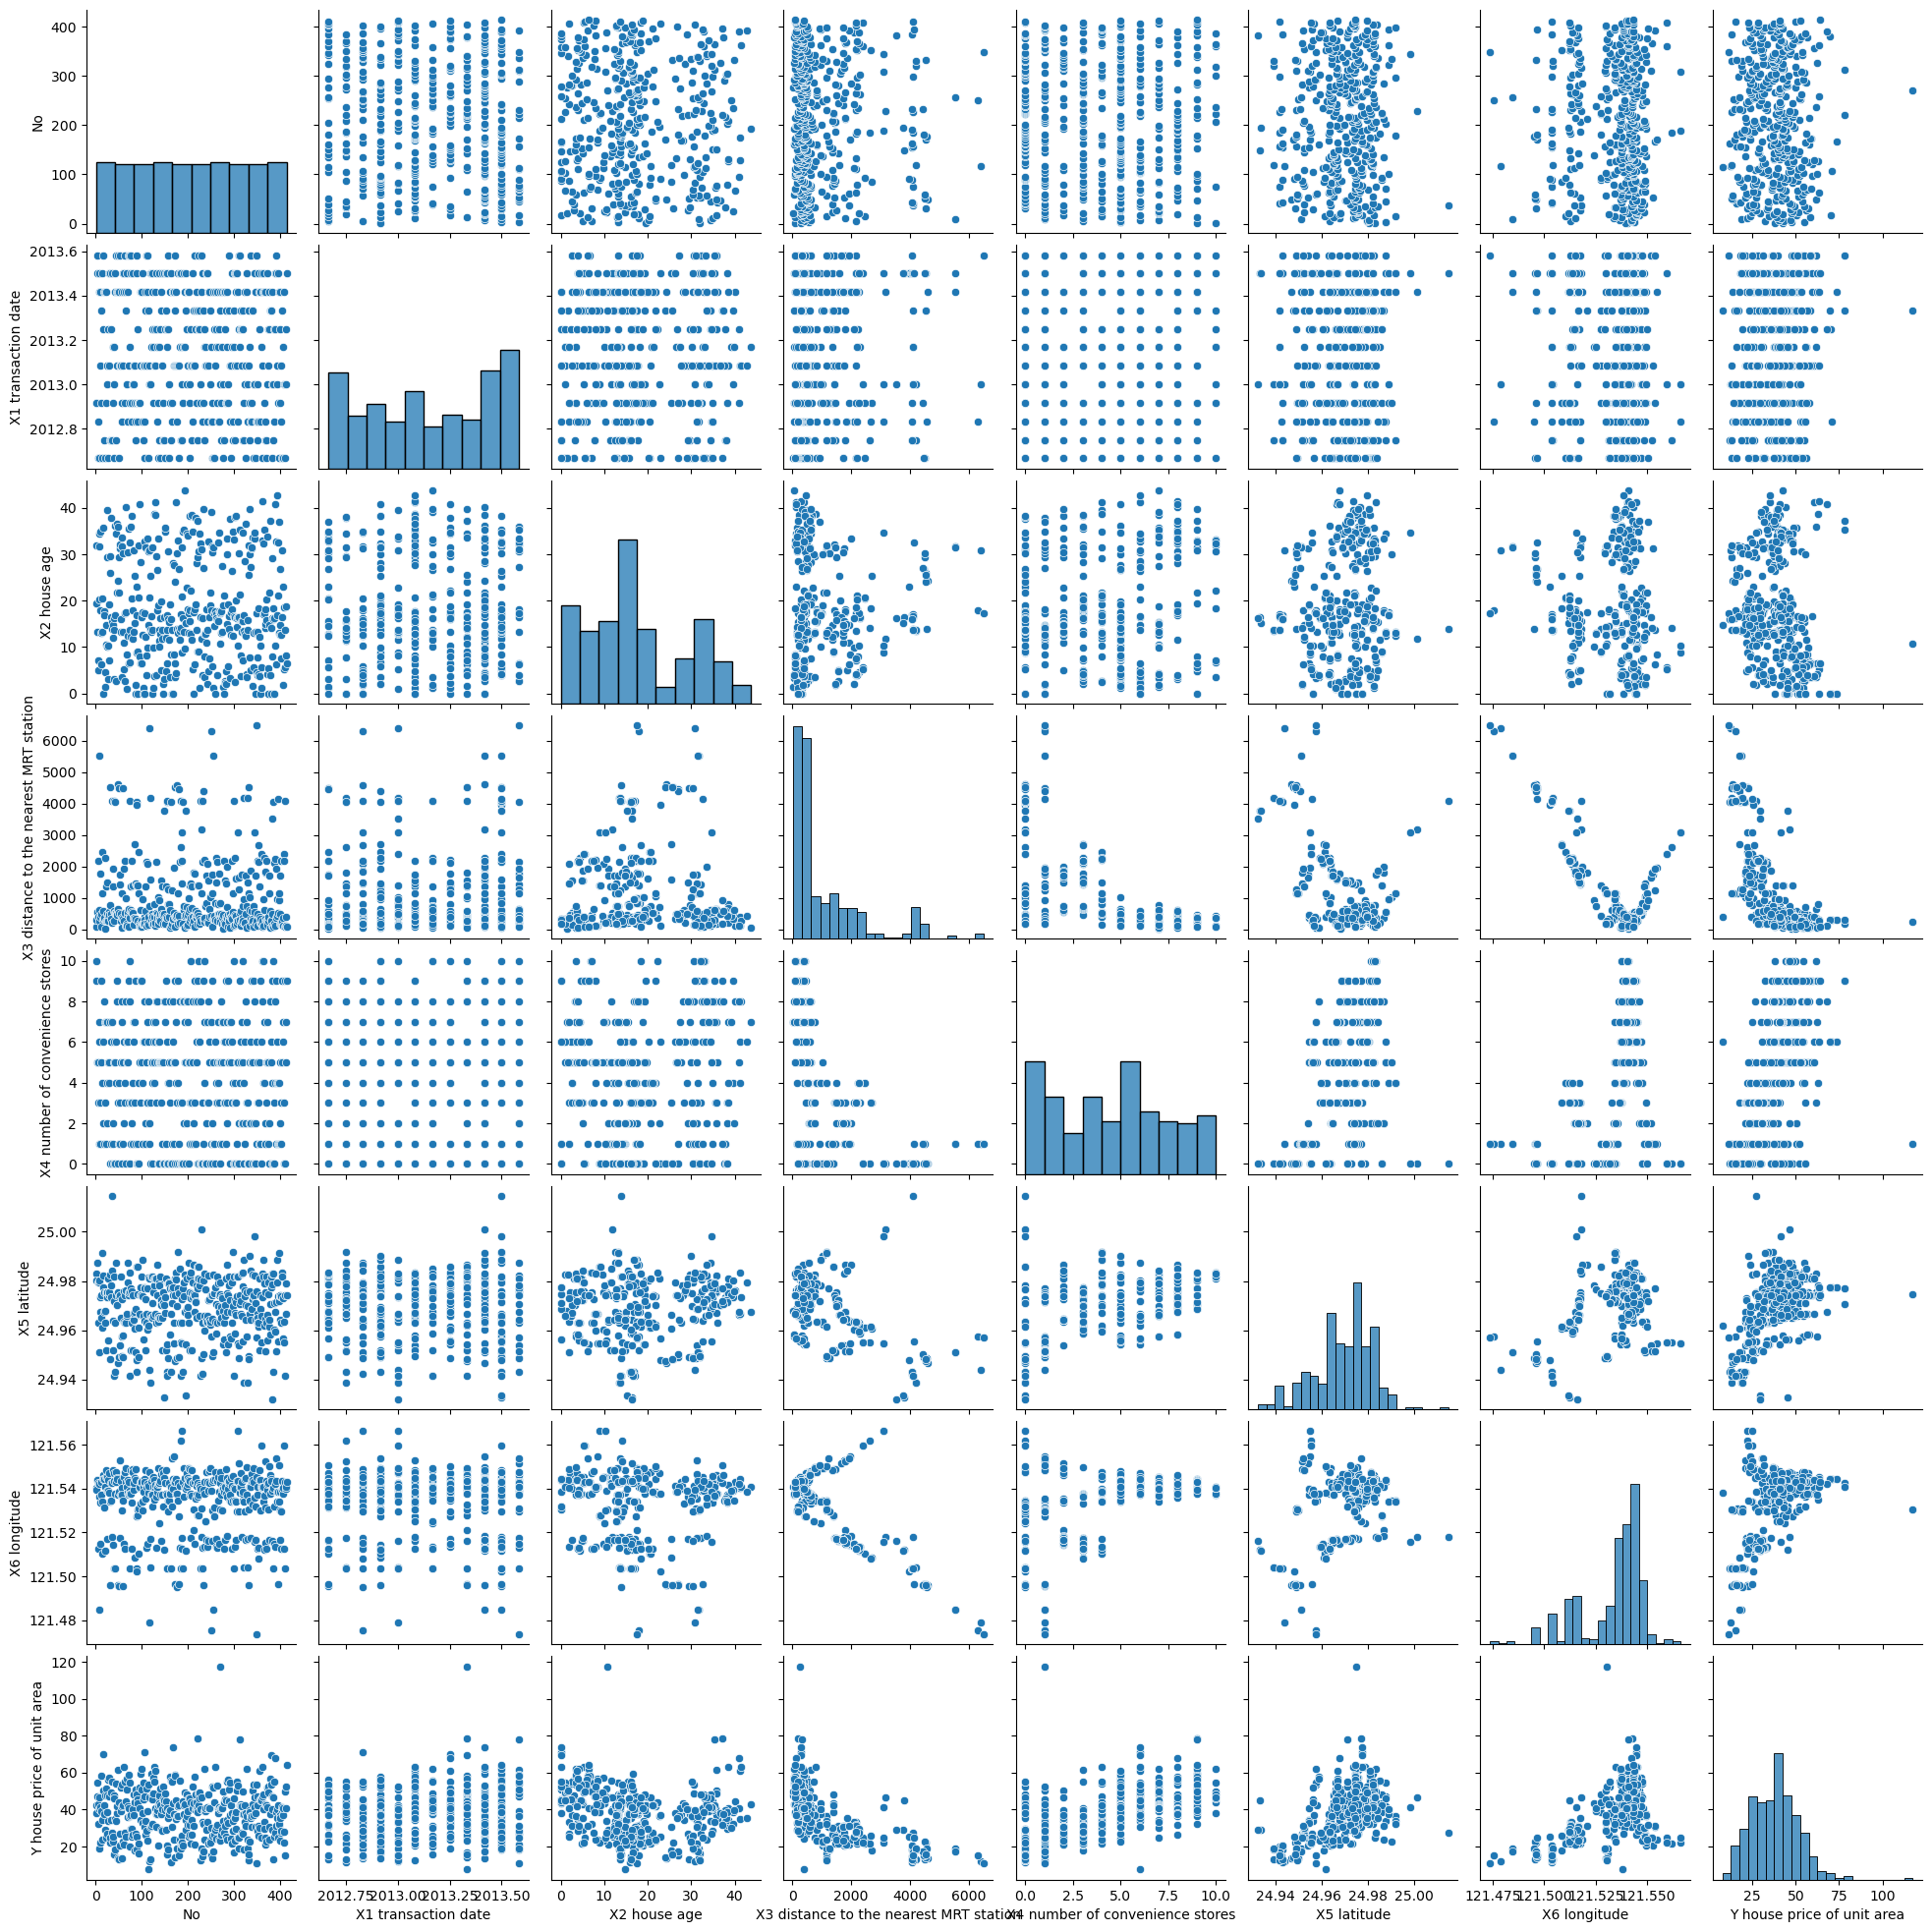

In [9]:
sns.pairplot(df)

# define X and y

In [10]:
X=df.drop('Y house price of unit area', axis=1)
y=df['Y house price of unit area']

y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

# Preprocessing

In [11]:
polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)
polynomial_converter.fit(X)
poly_features=polynomial_converter.transform(X)
poly_features.shape

(414, 35)

In [12]:
df.shape

(414, 8)

In [13]:
poly_features

array([[1.00000000e+00, 2.01291700e+03, 3.20000000e+01, ...,
        6.24149290e+02, 3.03643739e+03, 1.47720299e+04],
       [2.00000000e+00, 2.01291700e+03, 1.95000000e+01, ...,
        6.24017387e+02, 3.03609828e+03, 1.47718525e+04],
       [3.00000000e+00, 2.01358300e+03, 1.33000000e+01, ...,
        6.24373157e+02, 3.03707359e+03, 1.47729221e+04],
       ...,
       [4.12000000e+02, 2.01325000e+03, 1.88000000e+01, ...,
        6.23961931e+02, 3.03597212e+03, 1.47719376e+04],
       [4.13000000e+02, 2.01300000e+03, 8.10000000e+00, ...,
        6.23338106e+02, 3.03447431e+03, 1.47721345e+04],
       [4.14000000e+02, 2.01350000e+03, 6.50000000e+00, ...,
        6.23717159e+02, 3.03545749e+03, 1.47727252e+04]])

# Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.25, random_state=29)

print('\n',X_train)
print('\n',X_test)
print('\n',y_train)
print('\n',y_test)


 [[2.44000000e+02 2.01341700e+03 3.28000000e+01 ... 6.24118311e+02
  3.03633680e+03 1.47717844e+04]
 [7.90000000e+01 2.01291700e+03 3.82000000e+01 ... 6.23799577e+02
  3.03542601e+03 1.47704670e+04]
 [1.79000000e+02 2.01350000e+03 1.31000000e+01 ... 6.24588068e+02
  3.03736256e+03 1.47706493e+04]
 ...
 [3.50000000e+01 2.01275000e+03 1.54000000e+01 ... 6.24209750e+02
  3.03663916e+03 1.47725623e+04]
 [2.37000000e+02 2.01316700e+03 3.60000000e+00 ... 6.24161282e+02
  3.03640185e+03 1.47714004e+04]
 [3.72000000e+02 2.01350000e+03 4.10000000e+00 ... 6.22797444e+02
  3.03313032e+03 1.47718646e+04]]

 [[3.80000000e+01 2.01316700e+03 1.20000000e+01 ... 6.22604300e+02
  3.03288104e+03 1.47740184e+04]
 [9.70000000e+01 2.01341700e+03 6.40000000e+00 ... 6.23717159e+02
  3.03545749e+03 1.47727252e+04]
 [8.60000000e+01 2.01275000e+03 0.00000000e+00 ... 6.23427490e+02
  3.03477826e+03 1.47729755e+04]
 ...
 [9.10000000e+01 2.01283300e+03 0.00000000e+00 ... 6.23740635e+02
  3.03520218e+03 1.47696843e

# Training a Polynomial Regression Model

In [15]:
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)
y_pred=polymodel.predict(X_test)

y_pred

array([27.72787807, 56.62813112, 59.15556688, 43.93521741, 22.37473335,
       25.96549736, 51.73007382, 39.41791941, 17.1704751 , 35.49170562,
       35.59701101, 43.50532232, 35.73313792, 35.4537262 , 21.36979303,
       35.80855665, 35.65010073, 35.08079155, 49.7449555 , 41.77646086,
       61.18929717, 21.34739822, 31.42601693, 48.56180165, 36.28342338,
       48.68605882, 35.91079707, 47.98688511, 32.47765502, 52.11331319,
       27.41459779, 20.86491657, 37.7982528 , 25.69114713, 52.83165499,
       25.10488105, 30.0094173 , 38.78977516, 50.59862261, 25.16274783,
       32.93942153, 46.07515793, 35.31194039, 35.67589319, 37.2082    ,
       38.32568051, 31.60948789, 21.14686105, 44.96211026, 21.82445015,
       46.3561277 , 40.98214881, 30.09571454, 18.86599023, 44.42963223,
       34.00136668, 40.95388598, 39.20203228, 17.85727761, 18.17481496,
       17.89593155, 22.01985847, 40.67187556, 31.20581769, 19.89820919,
       43.11308426, 47.22322531, 33.6702944 , 57.75639665, 28.14

In [16]:
prediced_df=pd.DataFrame({"y_test":y_test,"y_predict":y_pred,"Residual":y_test-y_pred})
prediced_df

,y_test,y_predict,Residual
37,25.3,27.727878,-2.427878
96,59.5,56.628131,2.871869
85,50.8,59.155567,-8.355567
323,42.5,43.935217,-1.435217
331,15.6,22.374733,-6.774733
...,...,...,...
215,48.1,40.861324,7.238676
278,44.0,48.890012,-4.890012
90,45.4,56.028461,-10.628461
133,39.5,43.598591,-4.098591


# Evaluating the Model

In [17]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)
metricks=pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])
metricks

,metrics
MAE,5.373790
MSE,51.353867
RMSE,7.166161


# Compare to the normal linear regression

In [18]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X, y, test_size=0.3, random_state=29)
simplemodel=LinearRegression()
simplemodel.fit(Xn_train, yn_train)
ys_pred=simplemodel.predict(Xn_test)

MAE_simple = metrics.mean_absolute_error(yn_test,ys_pred)
MSE_simple = metrics.mean_squared_error(yn_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)

normal_metrixs=pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly], 'Simple Metrics':[MAE_simple, MSE_simple,RMSE_simple]}, index=['MAE', 'MSE', 'RMSE'])
normal_metrixs

,Poly Metrics,Simple Metrics
MAE,5.373790,6.097450
MSE,51.353867,64.922969
RMSE,7.166161,8.057479


# Adjusting Model Parameters

In [19]:
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,10):
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)

    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.25, random_state=29)

    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)

    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)

    #Evaluating the Model

    #RMSE of Train set
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

    #RMSE of Test Set
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

    #Append the RMSE to the Train and Test List

    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

print(test_RMSE_list)
print("\n\n",test_RMSE_list)

[8.003547106799312, 7.166161211055691, 9.022295790824655, 66.28602393159382, 1212.4470824571458, 8920.575204544914, 143515.5525028335, 1271410.2044011955, 4229109.623174084]


 [8.003547106799312, 7.166161211055691, 9.022295790824655, 66.28602393159382, 1212.4470824571458, 8920.575204544914, 143515.5525028335, 1271410.2044011955, 4229109.623174084]


In [20]:
print(metrics.r2_score(y_train,y_train_pred)*100)

99.41024438831946


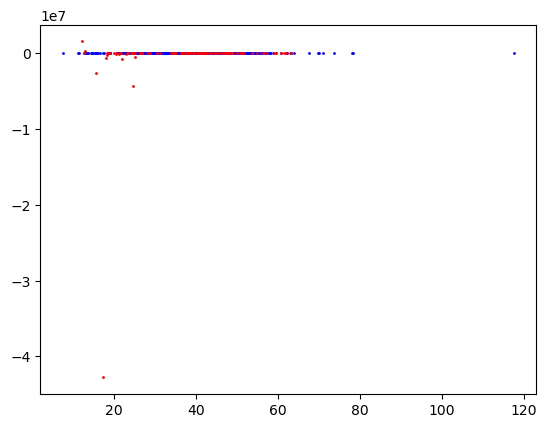

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_train, y_train_pred,s=1,c='blue')
ax.scatter(y_test, y_test_pred,s=1,c='red')
plt.show()